<a href="https://colab.research.google.com/github/meena-shankar/E-commerce-Review-Sentiment-Analysis/blob/main/customer_segmentation_Age_and_Polarity_k_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [58]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [59]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [60]:
df.drop(["Unnamed: 0","Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [61]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [62]:
len(df)

23486

In [63]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [64]:
df.dtypes

Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [65]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [66]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [67]:
df['Recommended IND'].unique()

array([1, 0])

In [68]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [69]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Grouping according to Age**

In [71]:
df['Age'].value_counts()

39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

In [72]:
df['Age']=df['Age'].astype(int)

**dividing age group into categories**

In [73]:
def age_cat(age):
    if age < 20:
        return 'teens'
    elif age < 30 :
        return '20s'
    elif age < 40 :
        return '30s'
    elif  age < 50 :
        return '40s'
    elif  age < 60 :
        return '50s' 
    elif  age < 70 :
        return '60s'
    else:
        return 'above 70s'

In [74]:
df['age_categorize'] = df['Age'].apply(age_cat)

In [75]:
df.head(3)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30s
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30s
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s


In [76]:
df['age_categorize'].value_counts()

30s          7702
40s          6127
50s          3948
20s          2887
60s          2305
above 70s     473
teens          44
Name: age_categorize, dtype: int64

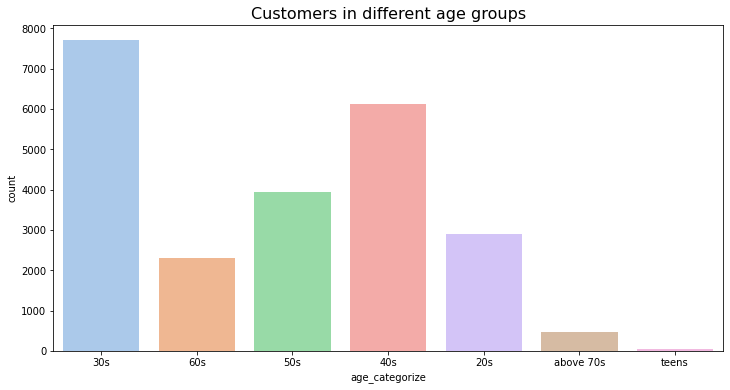

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='age_categorize',data=df, palette= 'pastel' )
plt.title('Customers in different age groups', fontsize=16)
plt.show()

# Sentiment Analysis

In [78]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
df.dtypes

Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
age_categorize             object
dtype: object

In [80]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [81]:
df['Review Text'].dtypes

dtype('O')

Removing the rows that has null values

In [82]:
df = df[~df['Review Text'].isnull()]

In [83]:
df['length']=df['Review Text'].apply(len)

In [84]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize,length
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30s,53
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30s,303
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50s,124
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192


Length after removing the rows where Review Text is null

In [85]:
len(df)

22641

Text(0.5, 1.0, 'message length')

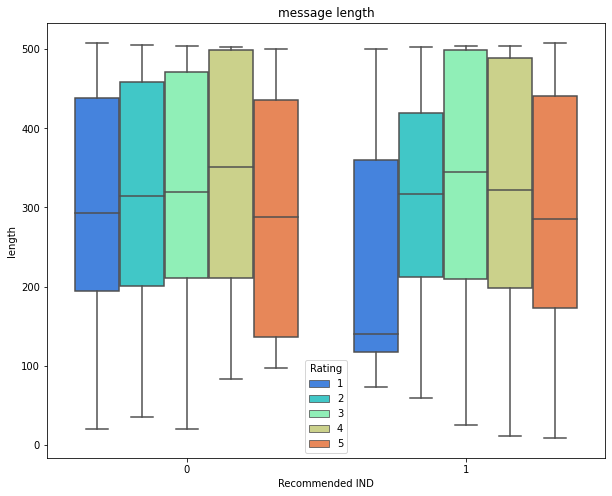

In [86]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

In [87]:
df.length.describe()


count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: length, dtype: float64

maximum length is 508.

In [88]:
df[df['length'] == 508]['Review Text'].iloc[0]


'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

**Removing puntuations**

In [89]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize,length
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,30s,53
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,30s,303
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500
3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,50s,124
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192


**Text blob for polarity**

In [90]:
from textblob import TextBlob
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize,length
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,30s,53
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,30s,303
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500
3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,50s,124
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192


In [91]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [92]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize,length,Polarity
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,30s,53,0.633333
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,30s,303,0.318750
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500,0.076392
3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,50s,124,0.500000
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192,0.393750


In [93]:
df['Polarity'].min()

-0.9750000000000001

In [94]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'
   

In [95]:
 df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)


In [97]:
df.head(3)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize,length,Polarity,TextBlob_Analysis
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,30s,53,0.633333,Positive
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,30s,303,0.318750,Positive
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500,0.076392,Positive


In [99]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [100]:
polarity_plot

Positive    21213
Negative     1333
Neutral        95
Name: TextBlob_Analysis, dtype: int64

In [101]:
positive= 21213/len(df)*100
negative= 1333/len(df)*100
neutral= 95/len(df)*100

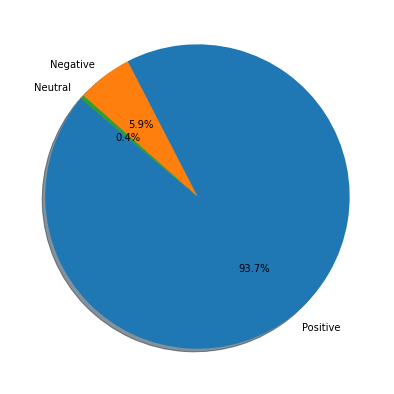

In [102]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

***Label Encoding***

In [103]:
 #Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])
  
df['Encoded_value'].unique()

array([2, 0, 1])

In [104]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize,length,Polarity,TextBlob_Analysis,Encoded_value
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,30s,53,0.633333,Positive,2
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,30s,303,0.318750,Positive,2
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500,0.076392,Positive,2
3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,50s,124,0.500000,Positive,2
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192,0.393750,Positive,2


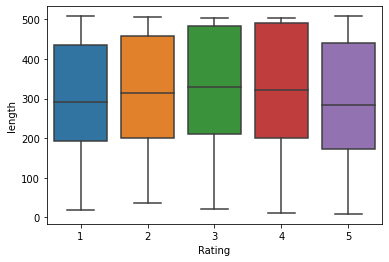

In [105]:
sns.boxplot(x="Rating", y="length", data=df,)

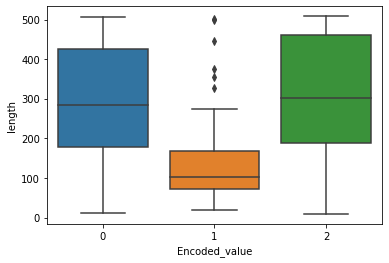

In [106]:
sns.boxplot(x="Encoded_value", y="length", data=df,)

In [107]:
df['Polarity'].min()

-0.9750000000000001

In [108]:
df['Polarity'].max()

1.0

# **K-means clustering**

In [118]:
x= df.iloc[:, [0,10]].values

**Finding the k value**

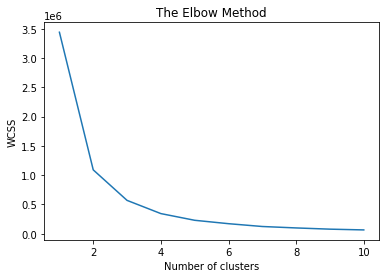

In [119]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Number of clusters is 4. After 4 the value decreases gradually

In [132]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(x)

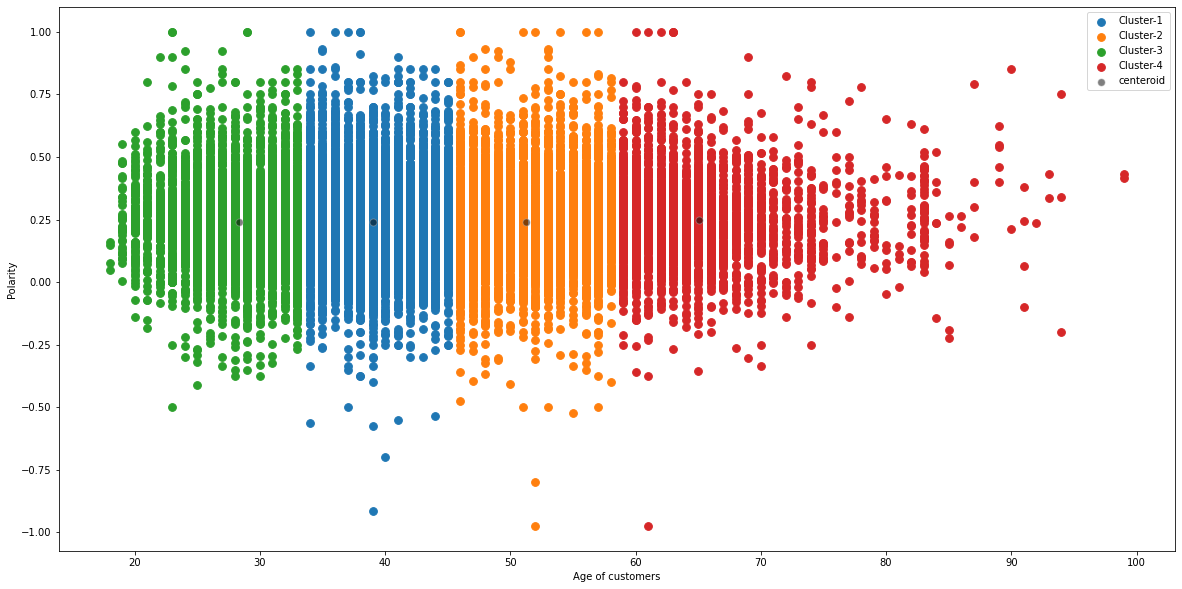

In [148]:
plt.figure(figsize=(20,10))
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],label = 'Cluster-1', s = 60)
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],label = 'Cluster-2', s = 60)
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],label = 'Cluster-3', s = 60)
plt.scatter(x[y_pred == 3,0],x[y_pred == 3,1],label = 'Cluster-4', s = 60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid',alpha=0.5,edgecolor='darkgrey')
plt.legend()
plt.xlabel('Age of customers')
plt.ylabel('Polarity')
plt.show()

The customers are divided into 4 cluster with the average polarity of 0.25. In this dataset, most of the reviews are positive. So we get the points above 0.0.